# Classifiez automatiquement des biens de consommation

Nous Travaillons pour l'entreprise Place de marché qui souhaite lancer une marketplace e-commerce. 

Notre mission : 
Nous devons faire une étude de faisabilité d'un moteur de classification des articles en différentes catégories.

Pour cela nous avons à disposition la description texte de produits ainsi que leur images.

# Traitement des données text

Dans un premier nous nous panchons sur les données textuelles.  

Nous allons utiliser plusieurs méthodes tq :   
- Le comptage des mots 
- Le Tf-idf
- Des approches de type word/sentence embeding

**Importation des données**

In [4]:
import pandas as pd

In [5]:
path = r"D:\Documents\Road2DataScience\OCProjets\Projet6\Data\Flipkart\flipkart_com-ecommerce_sample_1050.csv"

In [6]:
data_txt = pd.read_csv(path)

In [7]:
data_txt

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

## Première exploration

Nous avons 1050 produits, avec leurs noms, prix etc..
Nous devons nous focaliser sur les descriptions du produit ainsi que sur les catégories.

In [8]:
# Les catégories exemples

data_txt.loc[0,'product_category_tree']

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

**Nous pouvons constater que nous avons une arborescence, avec une catégorie principale qui se décline en sous catégories**  

Comptons le nombre de catégories principale :

In [9]:
test = data_txt.loc[0,'product_category_tree']


In [10]:
test = test.replace('["', '')
test.split(">>")

['Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [11]:
def lambda_cat(cat_tree):
    cat_tree = cat_tree.replace('["', '')
    cat_tree = cat_tree.split(">>")
    return cat_tree[0]
    

In [12]:
all_cat = data_txt['product_category_tree'].apply(lambda x : lambda_cat(x))

In [13]:
all_cat

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: product_category_tree, Length: 1050, dtype: object

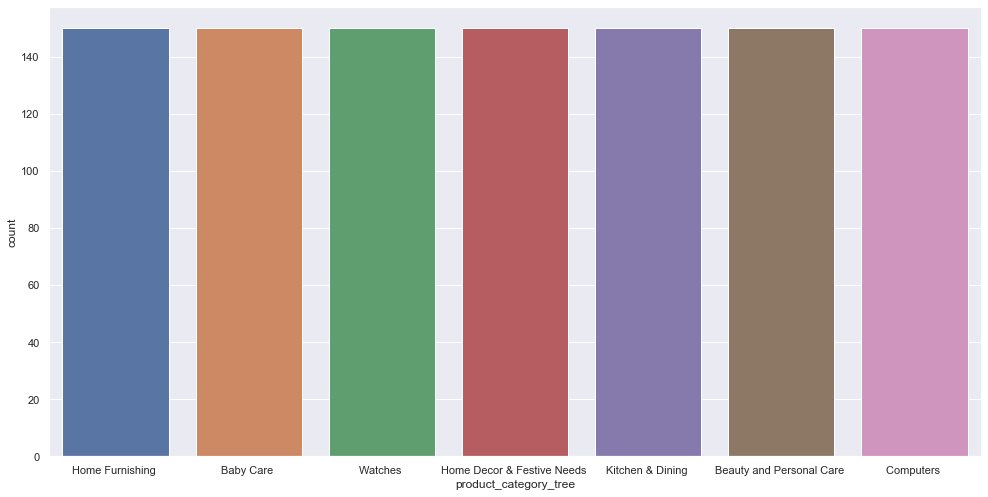

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16.7,8.27)})


sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x=all_cat)

In [15]:
pd.DataFrame(all_cat).value_counts()

product_category_tree      
Baby Care                      150
Beauty and Personal Care       150
Computers                      150
Home Decor & Festive Needs     150
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
dtype: int64

 Il y a donc 7 catégories majeures, avec le meme nombre de produit : 150

**Tokenisation et nettoyage avec NLTK**  
Note : il est parfois important, pour un fonctionenement de Word2Vect, de séparer les phrases une par une avant de faire l'entrainement.
Ici nous allons faire une première approche dans l'objectif de faire un bag of words

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
# Mot par mot
tokens = word_tokenize(data_txt.loc[0,'description'])

from nltk.tokenize import word_tokenize

# Garder que les charactères lettres
words = [word for word in tokens if word.isalpha()]

# Enlever les stops words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

words = [w for w in words if not w in stop_words]

# Lematisation
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pouru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pouru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stemmed

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'pack',
 'price',
 'Rs',
 'thi',
 'curtain',
 'enhanc',
 'look',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'make',
 'room',
 'environ',
 'romant',
 'curtain',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'the',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'these',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'softli',
 'fil

## Nétoyage du texte 

Afin de rendre notre corpus exploitable nous devons proceder aux atapes suivantes :  
- Supprimer les stops words 
- Supprimer les caractères numériques 
- Convertir en minuscules
- Lematisation

In [19]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    # Garder que les charactères lettres
    words_alpha = [word for word in list_words if word.isalpha()]
    lw = [w.lower() for w in words_alpha if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pouru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
data_features = data_txt[['uniq_id','product_name','product_category_tree','description']].copy()
data_features['product_category_tree'] = all_cat

In [21]:
data_corpus = data_txt[['description']]

In [22]:
data_corpus['description'].apply(lambda x : transform_bow_fct(x))

0       key features elegance polyester multicolor abs...
1       specifications sathiyas cotton bath towel bath...
2       key features eurospa cotton terry face towel s...
3       key features santosh royal fashion cotton prin...
4       key features jaipur print cotton floral king s...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker on...
1049    buy uberlyfe large vinyl sticker online uberly...
Name: description, Length: 1050, dtype: object

In [23]:
data_corpus_bow_fct = data_corpus['description'].apply(lambda x : transform_bow_fct(x))
data_features['tokens_bow'] = data_corpus_bow_fct
corpus_tokens_bow = word_tokenize(''.join(data_corpus_bow_fct.to_list()))
num_values = len(set(corpus_tokens_bow))
print(num_values)

5213


In [24]:
data_corpus['description'].apply(lambda x : transform_bow_lem_fct(x))

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker on...
1049    buy uberlyfe large vinyl sticker online uberly...
Name: description, Length: 1050, dtype: object

In [191]:
data_corpus_bow_lem_fct = data_corpus['description'].apply(lambda x : transform_bow_lem_fct(x))
data_features['tokens_bow_lem'] = data_corpus_bow_lem_fct
corpus_tokens_bow_lem = word_tokenize(''.join(data_corpus_bow_lem_fct.to_list()))
num_values = len(set(corpus_tokens_bow_lem))
print(num_values)

4809


In [26]:
data_features 

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                           product_name product_category_tree  \
0     Elegance Polyester Multicolor Abstract Eyelet ...      Home Furnishing    
1                            Sathiyas Cotton Bath Towel            Baby Care    
2                   Eurospa Cotton Terry Face Towel Set            Baby Care    
3     SANTOSH ROYAL FASHION Cotton Printed King size...      Home Furnishing    
4     Jaipur Print Cotton Floral King sized Double B...      Home Furnishing    
...                                                 ...                   ...   
1045     Oren Empower Extra Large Self Adhesive Sticker            Baby Care    
1046             Wallmantra Large Vinyl Sticker Sticker            Baby Care    
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...            Baby Care    
1048            Wallmantra Medium Vinyl Sticker Sticker            Baby Care    
1049                       Uberlyfe Large Vinyl Sticker            Baby Care    

                                            description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                             tokens_bow  \
0     key features elegance polyester multicolor abs...   
1     specifications sathiyas cotton bath towel bath...   
2     key features eurospa cotton terry face towel s...   
3     key features santosh royal fashion cotton prin...   
4     key features jaipur print cotton floral king s...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker on...   
1049  buy uberlyfe large vinyl sticker online uberly...   

                                         tokens_bow_lem  
0     key feature elegance polyester multicolor abst...  
1     specification sathiyas cotton bath towel bath ...  
2     key feature eurospa cotton terry face towel se...  
3     key feature santosh royal fashion cotton print...  
4     key feature jaipur print cotton floral king si...  
...                                                 ...  
1045  oren empower extra large self adhesive sticker...  
1046  wallmantra large vinyl sticker sticker pack pr...  
1047  buy uberlyfe extra large pigmented polyvinyl f...  
1048  buy wallmantra medium vinyl sticker sticker on...  
1049  buy uberlyfe large vinyl sticker online uberly...  

[1050 rows x 6 columns]

## Cloud words
Visualiser les mots les plus présents (après lemmatisation) par catégories

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [28]:
data_corpus['categorie_main'] = all_cat
data_corpus

C:\Users\pouru\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


description    categorie_main
0     Key Features of Elegance Polyester Multicolor ...  Home Furnishing 
1     Specifications of Sathiyas Cotton Bath Towel (...        Baby Care 
2     Key Features of Eurospa Cotton Terry Face Towe...        Baby Care 
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  Home Furnishing 
4     Key Features of Jaipur Print Cotton Floral Kin...  Home Furnishing 
...                                                 ...               ...
1045  Oren Empower Extra Large Self Adhesive Sticker...        Baby Care 
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...        Baby Care 
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...        Baby Care 
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...        Baby Care 
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...        Baby Care 

[1050 rows x 2 columns]

In [29]:
corpus_tokens = word_tokenize(''.join(data_corpus_bow_lem_fct.to_list()))

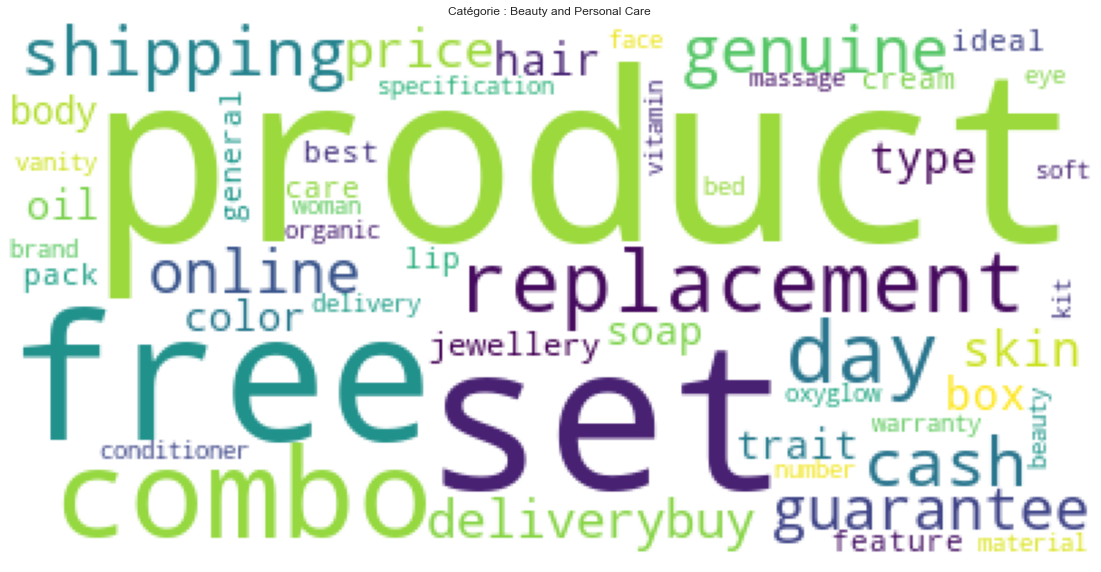

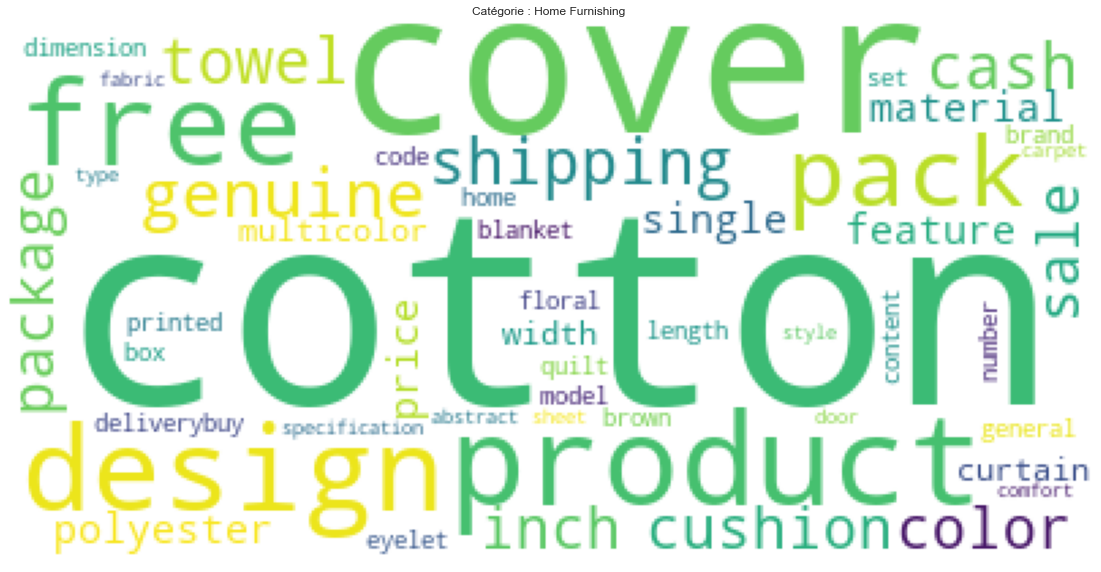

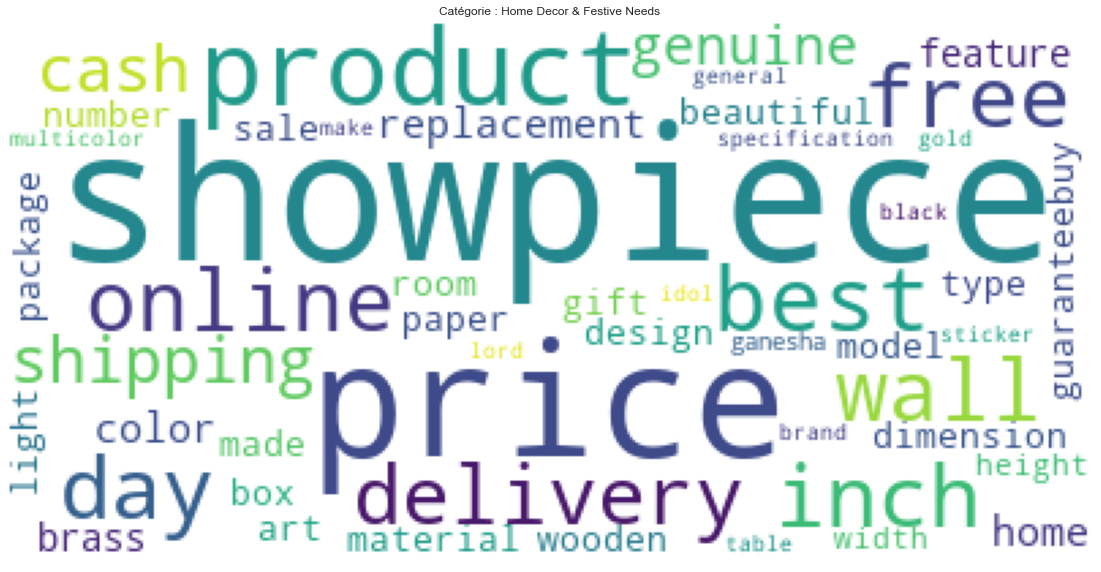

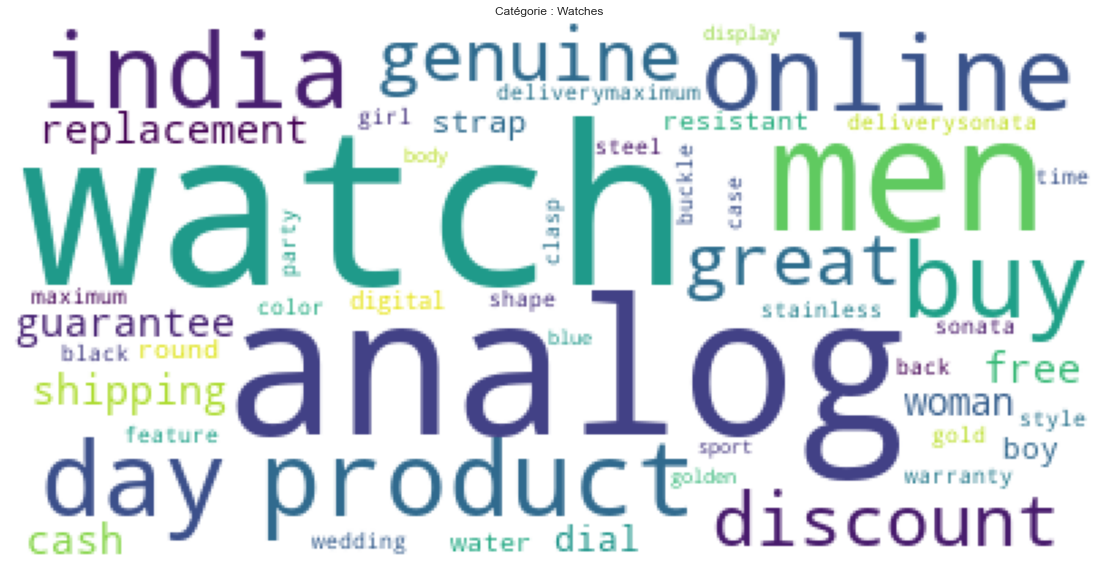

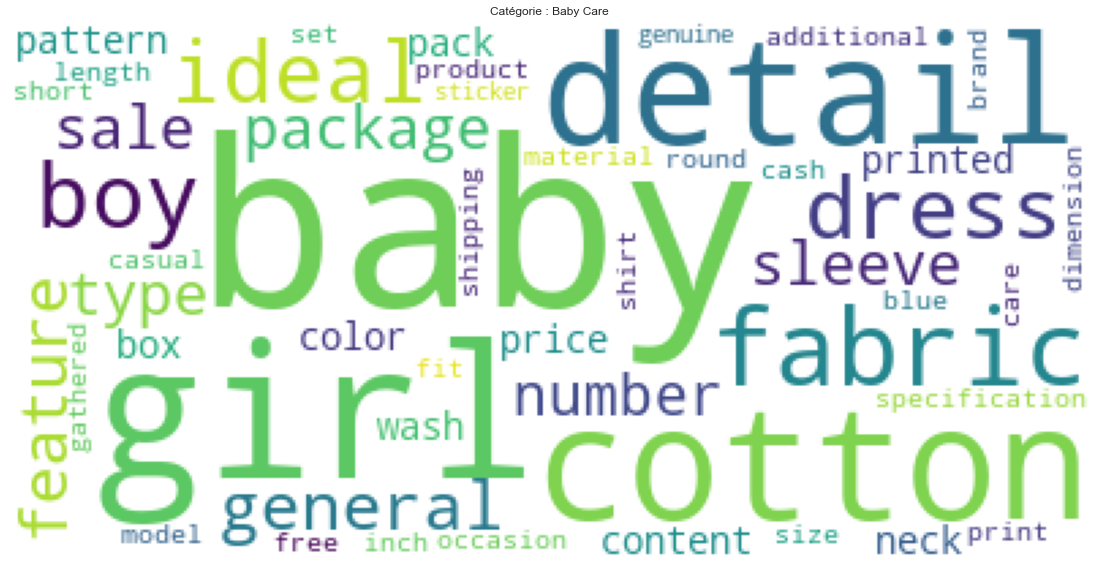

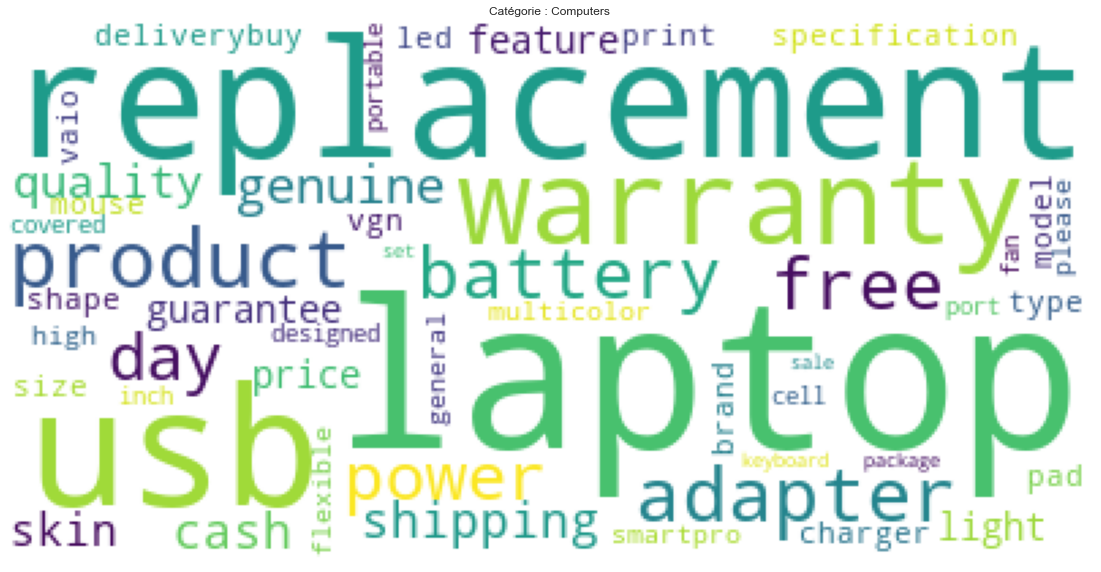

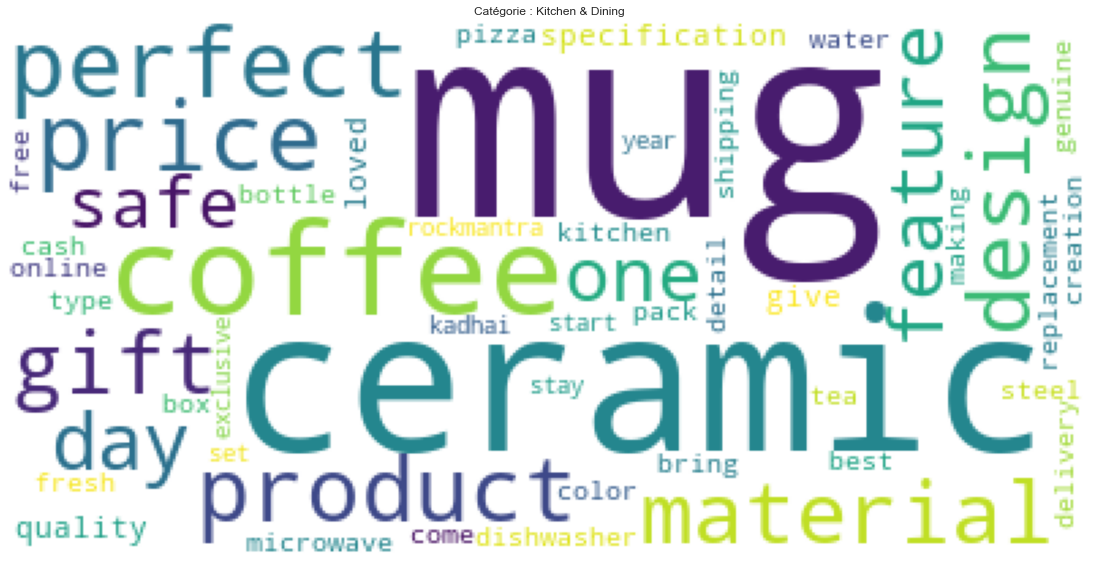

In [30]:
for cat in set(all_cat.values):
    corpus_cat_loc = data_corpus[data_corpus['categorie_main'] == cat]['description'].apply(lambda x : transform_bow_lem_fct(x))
    wordcloud = WordCloud(collocations=False,background_color = 'white', max_words = 50).generate(''.join(corpus_cat_loc.to_list()))
    plt.figure(figsize=(20,10)) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Catégorie : {cat}')
    plt.show()

## BOW

Nous allons utiliser deux méthodes de type bag of word :   
- Count vectorizer : Nombre d'occurence de chaque mot du corpus dans une description 
- Tf * idf :
    - Tf (term frequency) = fréquence du mot dans le documment
    - idf (inverse document frequency) = $$
\operatorname{idf}_{\mathrm{i}}=\log \frac{|D|}{\left|\left\{d_j: t_i \in d_j\right\}\right|}
$$
$$
|D|
:\text{ nombre total de documents dans le corpus };
$$
$$
\left|\left\{d_j: t_i \in d_j\right\}\right|: \text { nombre de documents où le terme } t_i \text { apparaît (c'est-à-dire } n_{i, j} \neq 0 \text { ). }
$$

In [92]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'tokens_bow_lem'
cv_fit = cvect.fit(data_features[feat])
ctf_fit = ctf.fit(data_features[feat])

cv_transform = cvect.transform(data_features[feat])  
ctf_transform = ctf.transform(data_features[feat])  

In [79]:
ctf_transform

<1050x4241 sparse matrix of type '<class 'numpy.float64'>'
	with 30876 stored elements in Compressed Sparse Row format>

In [80]:
cv_fit.vocabulary_

{'key': 2028,
 'feature': 1388,
 'elegance': 1207,
 'polyester': 2833,
 'multicolor': 2440,
 'abstract': 15,
 'eyelet': 1344,
 'door': 1112,
 'curtain': 927,
 'floral': 1463,
 'height': 1740,
 'pack': 2648,
 'price': 2905,
 'enhances': 1241,
 'look': 2188,
 'high': 1753,
 'quality': 2991,
 'style': 3680,
 'stitch': 3632,
 'metal': 2344,
 'make': 2256,
 'room': 3218,
 'environment': 1262,
 'romantic': 3215,
 'ant': 145,
 'wrinkle': 4208,
 'anti': 149,
 'shrinkage': 3426,
 'elegant': 1208,
 'home': 1778,
 'bright': 465,
 'modernistic': 2392,
 'appeal': 163,
 'design': 1020,
 'surreal': 3741,
 'attention': 232,
 'sure': 3733,
 'steal': 3617,
 'heart': 1734,
 'contemporary': 817,
 'valance': 4017,
 'slide': 3480,
 'smoothly': 3505,
 'draw': 1123,
 'apart': 158,
 'thing': 3841,
 'morning': 2414,
 'welcome': 4142,
 'sun': 3706,
 'ray': 3044,
 'want': 4106,
 'wish': 4177,
 'good': 1628,
 'world': 4197,
 'close': 695,
 'evening': 1286,
 'create': 889,
 'special': 3566,
 'moment': 2402,
 'joyou

In [81]:
ctf_transform.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
cv_transform.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### ACP

#### Sur tf-idf

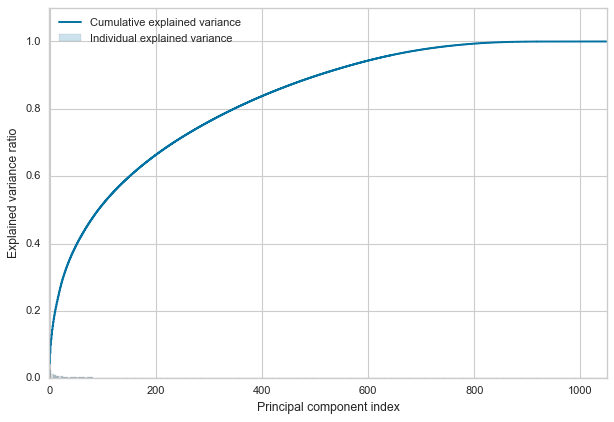

In [101]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
sc.fit(ctf_transform.toarray())

# IL ne faut pas scaler les données !!
#X_train_std = sc.transform(ctf_transform.toarray())
# Instantiate PCA

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(ctf_transform.toarray())
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.2, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-1, 1050])
plt.ylim([0, 1.1])
plt.show()

In [95]:
exp_var_pca

array([4.37316208e-02, 3.09385018e-02, 2.53459875e-02, ...,
       5.30790380e-34, 4.86640885e-34, 2.07185682e-34])

In [109]:
df_cumsum = pd.DataFrame(cum_sum_eigenvalues)

In [110]:
df_cumsum[df_cumsum[0] < 0.99]

0
0    0.043732
1    0.074670
2    0.100016
3    0.115431
4    0.130137
..        ...
768  0.989287
769  0.989441
770  0.989594
771  0.989744
772  0.989894

[773 rows x 1 columns]

In [170]:
len(df_cumsum)

1050

**En plaçant un seuil de variance expliquée à 0.99 nous avons réduit la dimentionnalité de notre problème passant de 1050 à 773**

Nous travaillons alors avec la representation  n_components = 610

In [111]:
pca = PCA(n_components = 773)
#
# Determine transformed features
#BoW_scaled_pca = pca.fit_transform(X_train_std) 
ctf_transform_pca = pca.fit_transform(ctf_transform.toarray())
BoW_scaled_pca = 0

#### Sur count vectorizer

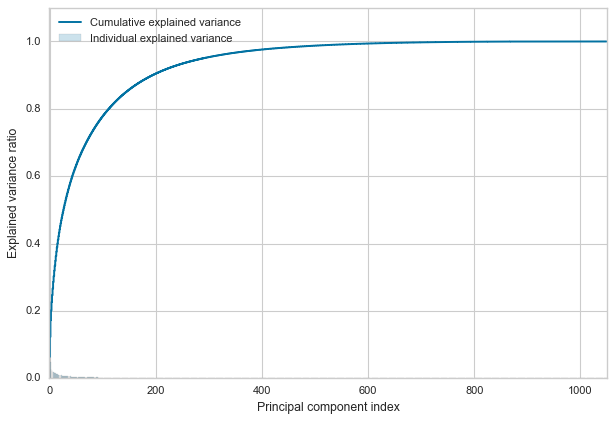

In [112]:
pca = PCA()
#
X_train_pca = pca.fit_transform(cv_transform.toarray())
#
exp_var_pca = pca.explained_variance_ratio_

#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.2, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-1, 1050])
plt.ylim([0, 1.1])
plt.show()

In [114]:
df_cumsum = pd.DataFrame(cum_sum_eigenvalues)
df_cumsum[df_cumsum[0] < 0.99]

0
0    0.063672
1    0.123045
2    0.172503
3    0.201266
4    0.226295
..        ...
527  0.989680
528  0.989751
529  0.989820
530  0.989890
531  0.989959

[532 rows x 1 columns]

In [115]:
pca = PCA(n_components = 532)
#
# Determine transformed features
#BoW_scaled_pca = pca.fit_transform(X_train_std) 
cv_transform_pca = pca.fit_transform(cv_transform.toarray())
BoW_scaled_pca = 0

## Clustering des descriptions

Comme nous l'avons constaté il existe 7 grandes catégories, nous aimerions qu'un algorithme de clustering puisse automatiquement les détecter

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import decomposition
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pcoords import parallel_coordinates
import plotly.express as px
import time
from tqdm.auto import tqdm

In [330]:
import time
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, true_cat, num_labels = 7, perplexity = 25) :
    time1 = time.time()
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(true_cat, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(10,10))
    y_cat_num_color =  np.arange(len(all_cat))
    ax = fig.add_subplot(211)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num_color, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(y_cat_num), loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(212)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)
    
    
    
def plot_tsne_true_false(X_tsne, true_label, labels_kmeans, ARI):
    
    df_tsne_best = pd.DataFrame(X_tsne)
    df_tsne_best['true_labels'] = true_label
    df_tsne_best['labels_kmeans'] = labels_kmeans
    
    fig, ax =plt.subplots( 2,1,figsize=(8, 14))
    
    ax[1].legend(bbox_to_anchor=(1.1, 1.05))
    sns.scatterplot(x=0, y=1, hue=df_tsne_best.true_labels.tolist(),
                    palette=sns.color_palette("hls", 7),
                    data=df_tsne_best, ax=ax[1]).set(title="Selon les vrais catégories") 
    sns.scatterplot(x=0, y=1, hue=df_tsne_best.labels_kmeans.tolist(),
                    palette=sns.color_palette("hls", 7),
                    data=df_tsne_best, ax=ax[0]).set(title="Selon les catégories prédites") 
    
    fig.show()
    

### ARI

Nous comparer le score ARI selon plusieurs paramètres :  
- Utilisation de quelles features ? CV ou TFiDF
- Utilisation ou non d'un scaler
- Amélioration ou non après la PCA
- Passer par une Tsne avant le clustering

**Premier cas : impact du scaler** 

In [121]:
cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(cv_transform.toarray())
print('Sans scaler cv')
adjusted_rand_score(cls.labels_,all_cat.values)

Sans scaler cv


0.06009741073363741

In [125]:
sc = StandardScaler()
sc.fit(cv_transform.toarray())

cv_transform_scaled = sc.transform(cv_transform.toarray())

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(cv_transform_scaled)
print('Avec scaler cv')
adjusted_rand_score(cls.labels_,all_cat.values)

Avec scaler cv


3.7457582577510483e-06

In [124]:
cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(ctf_transform.toarray())
print('Sans scaler ctf')
adjusted_rand_score(cls.labels_,all_cat.values)

Sans scaler ctf


0.18770343623034913

In [127]:
sc = StandardScaler()
sc.fit(ctf_transform.toarray())

ctf_transform_scaled = sc.transform(ctf_transform.toarray())

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(ctf_transform_scaled)
print('Avec scaler cv')
adjusted_rand_score(cls.labels_,all_cat.values)

Avec scaler cv


0.0001341325926466734

**Premières remarques** : 
- Le score ARI est très faible, il s'empire avec l'utilisation du scaler.

**Deuxième cas : Utilisation d'une TSNE avec et sans PCA au prélable**

In [132]:
print("Etude de l'ARI pour aprés count vectorizer non PCA" )

print("--------")
ARI, X_tsne, labels = ARI_fct(cv_transform.toarray(),all_cat.values)

print("Etude de l'ARI pour aprés count vectorizer avec PCA" )

print("--------")
ARI, X_tsne, labels = ARI_fct(cv_transform_pca,all_cat.values)


Etude de l'ARI pour aprés count vectorizer non PCA
--------
ARI :  0.4432 time :  24.0
Etude de l'ARI pour aprés count vectorizer avec PCA
--------
ARI :  0.4592 time :  23.0


In [133]:
print("Etude de l'ARI pour aprés tfidf non PCA" )

print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform.toarray(),all_cat.values)

print("Etude de l'ARI pour aprés tfidf avec PCA" )

print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform_pca,all_cat.values)

Etude de l'ARI pour aprés tfidf non PCA
--------
ARI :  0.4579 time :  20.0
Etude de l'ARI pour aprés tfidf avec PCA
--------
ARI :  0.5327 time :  20.0


**Conclusion :**  
- Il ne faut pas utiliser de standard scaler
- Le Tfidf donne dans tous les cas les meilleurs résultats
- Passer par une TSNE est primordiale pour augmenter le score
- Les résultats avec ACP à 0.99 améliore significativement les résultats

En conservant les mêmes labels mais en utisant les données de l'acp aprés scaling

#### Hyper optimisation de la TSNE pour augmenter l'ARI

La T SNE utilise un paramètre : la perplexité.  
Puisque nous avons constaté que le clustering devait se faire aprés la tsne, nous allons étudier le comportement de l'ARI en fonction de la perplexité.

In [135]:
rez_ari = []
for k in range(20):
    k = (k+1)*5
    print(f"Pour une perplexité de {k}")
    ARI, X_tsne, labels = ARI_fct(ctf_transform_pca,all_cat.values, num_labels = 7, perplexity = k)
    rez_ari.append(ARI)

Pour une perplexité de 5
ARI :  0.3843 time :  17.0
Pour une perplexité de 10
ARI :  0.6117 time :  17.0
Pour une perplexité de 15
ARI :  0.4727 time :  24.0
Pour une perplexité de 20
ARI :  0.5029 time :  36.0
Pour une perplexité de 25
ARI :  0.5327 time :  33.0
Pour une perplexité de 30
ARI :  0.4213 time :  26.0
Pour une perplexité de 35
ARI :  0.4638 time :  26.0
Pour une perplexité de 40
ARI :  0.4823 time :  29.0
Pour une perplexité de 45
ARI :  0.4297 time :  31.0
Pour une perplexité de 50
ARI :  0.4616 time :  30.0
Pour une perplexité de 55
ARI :  0.4409 time :  32.0
Pour une perplexité de 60
ARI :  0.4813 time :  33.0
Pour une perplexité de 65
ARI :  0.4835 time :  36.0
Pour une perplexité de 70
ARI :  0.3436 time :  36.0
Pour une perplexité de 75
ARI :  0.426 time :  38.0
Pour une perplexité de 80
ARI :  0.4491 time :  40.0
Pour une perplexité de 85
ARI :  0.3813 time :  39.0
Pour une perplexité de 90
ARI :  0.3658 time :  36.0
Pour une perplexité de 95
ARI :  0.3389 time :  

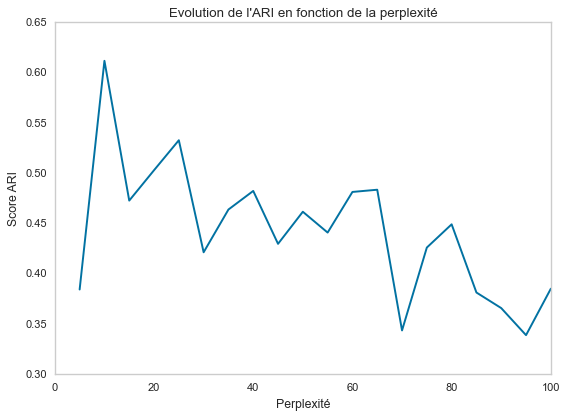

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(5, 105, 5)
s = rez_ari

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Perplexité', ylabel='Score ARI',
       title="Evolution de l'ARI en fonction de la perplexité" )
ax.grid()

fig.savefig("test.png")
plt.show()


Nous posons alors une perplexité à 10

ARI :  0.6117 time :  22.0


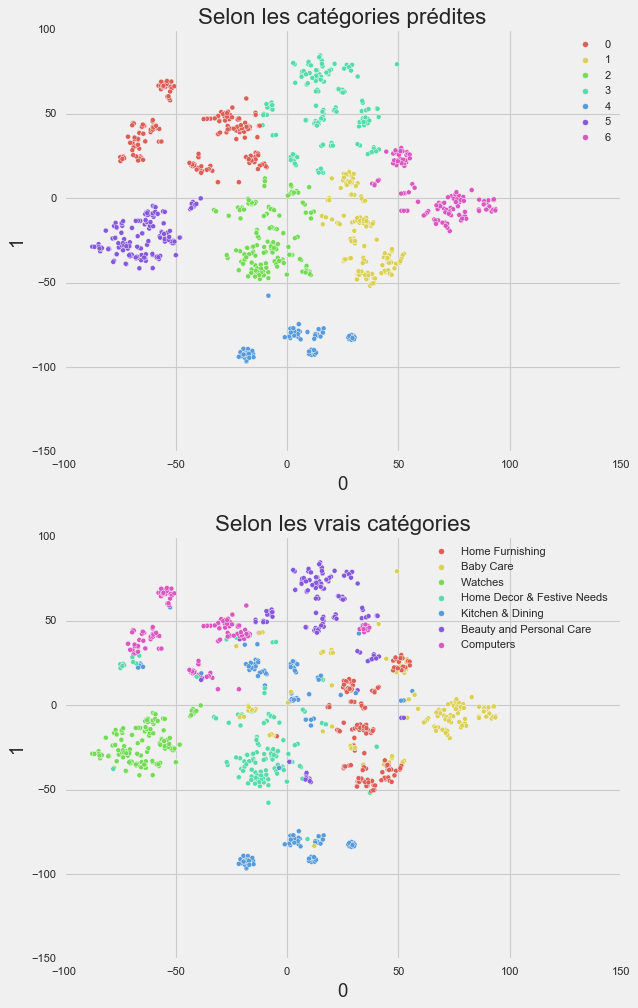

In [331]:
ARI, X_tsne, labels = ARI_fct(ctf_transform_pca,true_label, num_labels = 7, perplexity = 10)
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

1050

#### Qualité du clustering

Il est pertinent de se demander si notre clustering est de 'bonne' qualité.  
La variance intra cluster ainsi que le coefficient de silhouaite peuvent nous renseigner.

ARI :  0.6117 time :  21.0


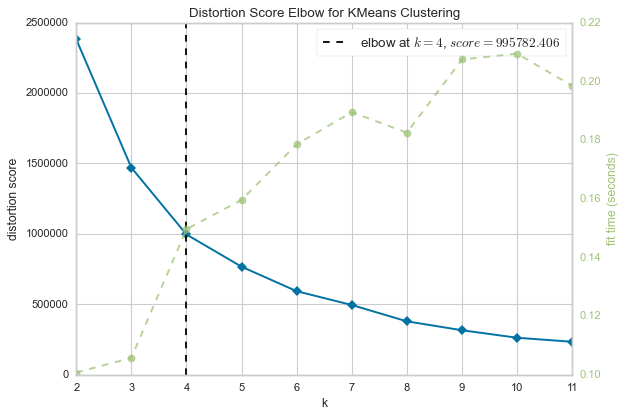

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
kmeans_params = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


model = KMeans(**kmeans_params)

ARI, X_tsne, labels = ARI_fct(ctf_transform_pca,all_cat.values, num_labels = 7, perplexity = 10)

visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(X_tsne)
visualizer.show()

  0%|          | 0/13 [00:00<?, ?it/s]

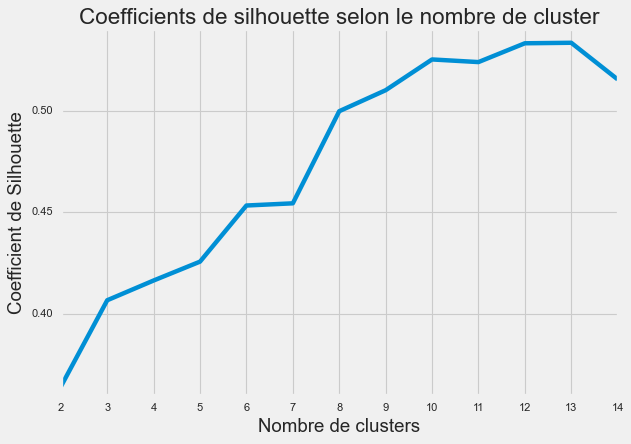

In [143]:
silhouette_coefficients = []
n = 15
# Notez que vous commencez à 2 clusters pour le coefficient de silhouette.
for k in tqdm(range(2, n)):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(X_tsne)
    score = silhouette_score(X_tsne, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, n), silhouette_coefficients)
plt.xticks(range(2, n))
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de Silhouette")
plt.title("Coefficients de silhouette selon le nombre de cluster")
plt.show()

**Remarque** :  
Nous constatons alors que le nombre de 7 clusters n'est pas forcément "naturel", c'est à dire que le coude de la distortion ne se situe pas en k = 7 et le coefficient de silhoutte continue d'augmenter de manière significative pour k>7

#### Matrice de confusion

Il est important d'étudier la matrice de confusion entre les classes estimées et les classes réelles.  
Nous pourons ainsi étudier les performances de nos prédiction selon les classes.

In [317]:
ARI, X_tsne, labels_best = ARI_fct(ctf_transform_pca,all_cat.values, num_labels = 7, perplexity = 10)

ARI :  0.6117 time :  23.0


In [318]:
index = pd.Index(labels_best)
index.value_counts()

0    192
3    177
2    170
5    151
1    148
6    134
4     78
dtype: int64

In [319]:
df_tsne_best = pd.DataFrame(X_tsne)
df_tsne_best['true_labels'] = true_label
df_tsne_best['labels_best'] = labels_best

In [320]:
def lambda_bordel(x):
    corresp = [2, 4, 3, 1, 5, 6, 0]
    return corresp[x]


df_tsne_best['labels_best']  = df_tsne_best['labels_best'].apply(lambda_bordel) 

In [321]:
sum(df_tsne_best["true_labels"] == df_tsne_best["labels_best"] )

841

In [322]:
df_tsne_best['bon_cluster'] = (df_tsne_best["true_labels"] == df_tsne_best["labels_best"])

[Text(0.5, 1.0, 'Vrai ou faux')]

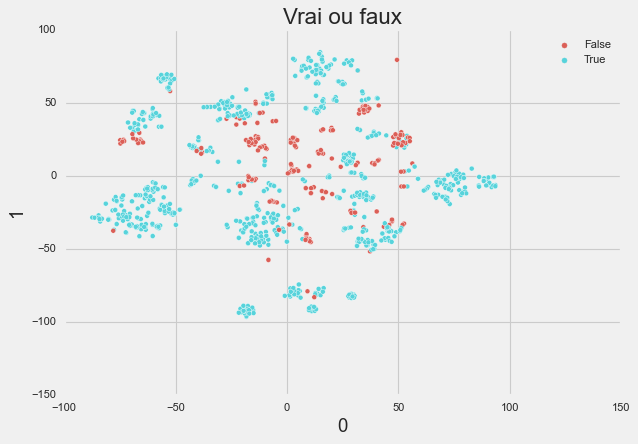

In [323]:
sns.scatterplot(x=0, y=1, hue=df_tsne_best.bon_cluster.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_tsne_best).set(title="Vrai ou faux") 

In [247]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_features["true_label"] = le.fit_transform(data_features['product_category_tree'])
true_label = data_features["true_label"].values

In [261]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [2, 4, 3, 1, 5, 6, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(true_label, labels_best)
conf_mat = metrics.confusion_matrix(true_label, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(true_label, cls_labels_transform))

Correspondance des clusters :  [2, 4, 3, 1, 5, 6, 0]
[[104  12   2  16  15   1   0]
 [  2 130   6  10   2   0   0]
 [  0  13 137   0   0   0   0]
 [  0   6  13 122   5   3   1]
 [ 25   0   0   1 124   0   0]
 [  3  16  34  21   2  74   0]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       150
           1       0.73      0.87      0.80       150
           2       0.71      0.91      0.80       150
           3       0.72      0.81      0.76       150
           4       0.84      0.83      0.83       150
           5       0.95      0.49      0.65       150
           6       0.99      1.00      1.00       150

    accuracy                           0.80      1050
   macro avg       0.82      0.80      0.80      1050
weighted avg       0.82      0.80      0.80      1050



Il faut assigner les classes corespondantes 

## Plongement de mots

Nous allons maintenant utiliser des méthodes de plongement de mots.  
Celles ci consistent à associer un mot (ou une phrase) à un vecteur en traduisant les similarités sémentiques par des relation algébriques entre les mots.  
Par exemple :  
- On peut calculer la distance d'un mot à l'autre (ex : chien sera plus proche de chat que de maison)
- faire des oppérations algébriques entre les mots (ex : roi - homme + femme = reine ) 

Ces features seront utilisées de la même manières que pour les bag of words -> acp -> tsne -> kmeans 

### Word to vect

In [324]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

def lambda_sep(x):
    return x.split(" ")

avant_modif = data_features['tokens_bow_lem'].apply( lambda x : lambda_sep(x))


w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
corpus = list(avant_modif.apply(lambda x : ' '.join(x))) 
sentences =  avant_modif.to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in corpus]

# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)


# Création de la matrice d'embedding

print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embeddings = embed_model.predict(x_sentences)
embeddings.shape

Build & train Word2Vec model ...
Vocabulary size: 4413
Word2Vec trained
Fit Tokenizer ...
Number of unique words: 4414
Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4414, 300)


(1050, 300)

ARI :  0.3018 time :  26.0


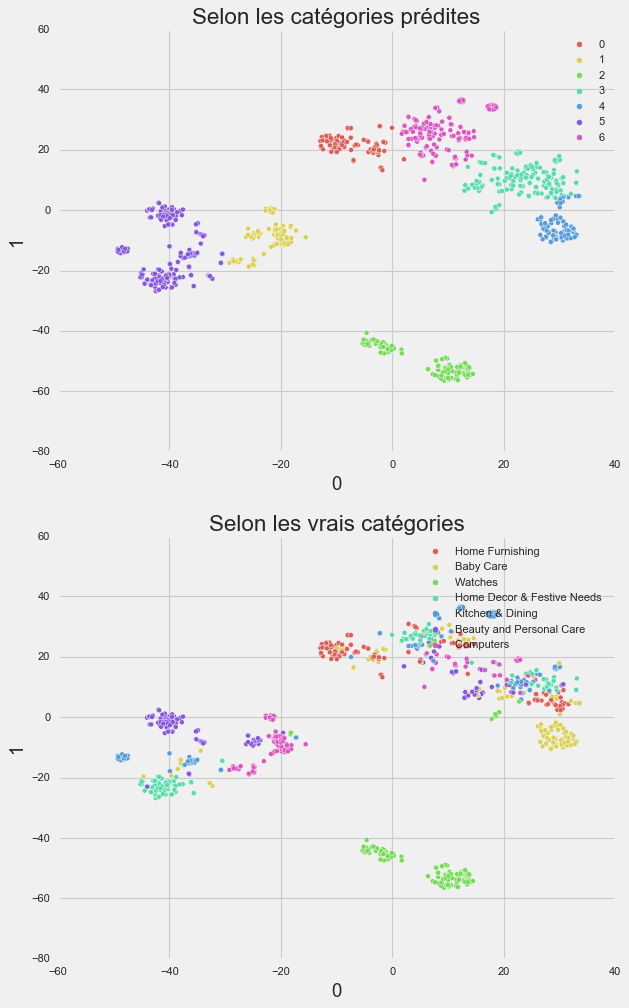

In [335]:
ARI, X_tsne, labels = ARI_fct(embeddings, all_cat.values,perplexity = 40)
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

### USE

In [336]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [337]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.7.0
2.7.0
Num GPUs Available:  0
True


In [338]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [339]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [340]:
batch_size = 10
sentences = data_features['tokens_bow_lem'].to_list()

In [341]:
features_USE = feature_USE_fct(sentences, batch_size)

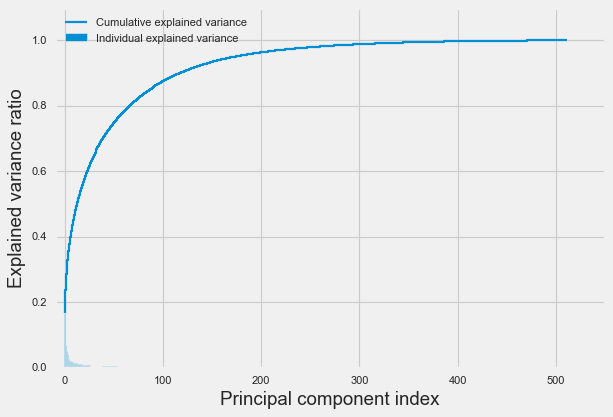

In [342]:
pca = PCA()
#
X_train_pca = pca.fit_transform(features_USE)
#
exp_var_pca = pca.explained_variance_ratio_

#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca,  align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, linewidth=2,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-10, 550])
plt.ylim([0, 1.1])
plt.show()

In [343]:
df_cumsum = pd.DataFrame(cum_sum_eigenvalues)


pca = PCA(n_components = len(df_cumsum[df_cumsum[0] < 0.99]))
#
# Determine transformed features
#BoW_scaled_pca = pca.fit_transform(X_train_std) 
features_USE_pca = pca.fit_transform(features_USE)

ARI :  0.4377 time :  26.0


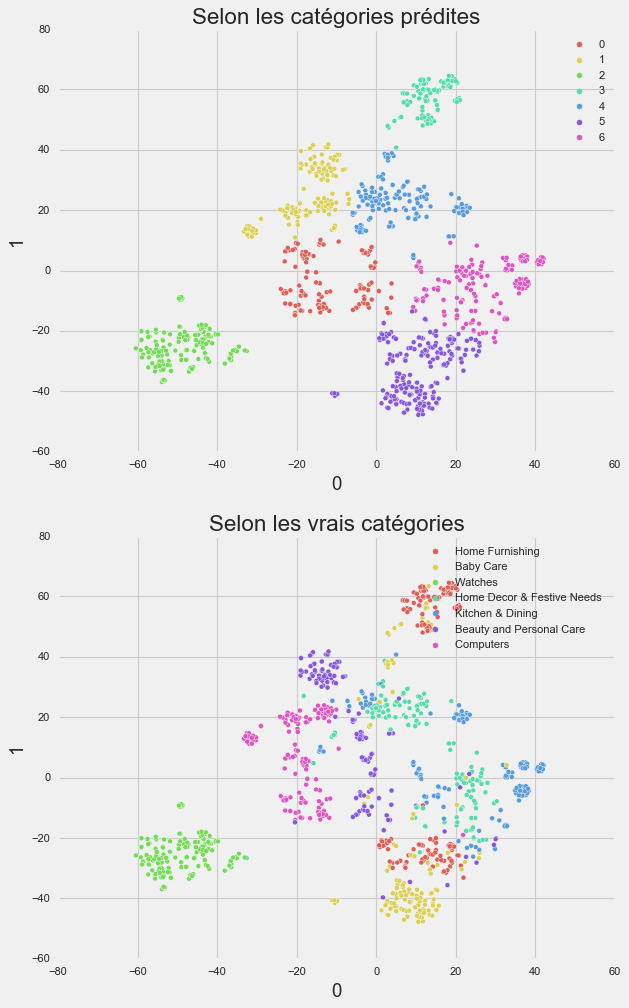

In [344]:
ARI, X_tsne, labels = ARI_fct(features_USE_pca,all_cat.values, num_labels = 7, perplexity = 30)
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

In [345]:
rez_ari = []
for k in range(10):
    k = (k+1)*10
    print(f"Pour une perplexité de {k}")
    ARI, X_tsne, labels = ARI_fct(features_USE_pca,all_cat.values, num_labels = 7, perplexity = k)
    rez_ari.append(ARI)

Pour une perplexité de 10
ARI :  0.4612 time :  20.0
Pour une perplexité de 20
ARI :  0.4435 time :  22.0
Pour une perplexité de 30
ARI :  0.4377 time :  25.0
Pour une perplexité de 40
ARI :  0.3933 time :  26.0
Pour une perplexité de 50
ARI :  0.3978 time :  35.0
Pour une perplexité de 60
ARI :  0.3982 time :  32.0
Pour une perplexité de 70
ARI :  0.3899 time :  29.0
Pour une perplexité de 80
ARI :  0.3696 time :  28.0
Pour une perplexité de 90
ARI :  0.4112 time :  38.0
Pour une perplexité de 100
ARI :  0.3886 time :  38.0


In [101]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [189]:
def lambda_sep(x):
    return x.split(" ")

data_features['tokens_bow_lem'] = data_features['tokens_bow_lem'].apply( lambda x : lambda_sep(x))

In [104]:
import gensim

w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_corpus_bow_lem_fct.to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [105]:
sentences

[['key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'height',
  'pack',
  'price',
  'this',
  'curtain',
  'enhances',
  'look',
  'interiors',
  'this',
  'curtain',
  'made',
  'high',
  'quality',
  'polyester',
  'fabric',
  'it',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'it',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'this',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'the',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'these',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want'

In [106]:
from gensim.models import Word2Vec
model_perso = Word2Vec(sentences,vector_size = 100, window = 5, min_count=1)

In [107]:
print(model_perso)

Word2Vec<vocab=4712, vector_size=100, alpha=0.025>


In [108]:
# access vector for one word
model_perso.wv['cat']

array([-0.00471074,  0.01612777, -0.01728807,  0.00264318,  0.00013262,
       -0.02883472,  0.00124037,  0.02651603, -0.00749915,  0.00057525,
       -0.01112934, -0.01942033,  0.00092119,  0.00308192,  0.01328877,
       -0.0156805 , -0.01034595, -0.03837533, -0.00360726, -0.00107207,
        0.00098216,  0.0123704 ,  0.00811248, -0.00949809, -0.0084902 ,
        0.00489664, -0.01435632, -0.01978582, -0.00591435,  0.00302152,
        0.012998  ,  0.01080425,  0.01360177, -0.00582092, -0.01204402,
        0.01562889, -0.01893956, -0.0215442 , -0.00833154, -0.03504002,
       -0.00389801, -0.02118728, -0.00068736,  0.00592462,  0.01319168,
        0.00587878, -0.00691774, -0.01263524,  0.02146992,  0.00495388,
       -0.00123598, -0.00803061,  0.01952857,  0.00124235, -0.00855928,
        0.01746303,  0.01703171,  0.01384368, -0.01397516,  0.01099532,
        0.02117065, -0.00755475, -0.01277054,  0.00092459, -0.01355702,
        0.00031299,  0.00214073,  0.01546929, -0.00878625,  0.00

In [74]:
def lambda_word_embeding2(x, model):
    tokenised = x
    nb_succes_tokenised = 0
    
    for word in tokenised :
        sum_word_vector =  np.zeros(model.vector_size)
        try : 
            rez_model = model.wv[word]
            nb_succes_tokenised += 1
        except : 
            rez_model = np.zeros(model.vector_size)
            
        sum_word_vector = sum_word_vector + rez_model
    
    return (sum_word_vector / nb_succes_tokenised).tolist()

In [75]:
data_features['pretrained_W2V_perso'] = data_features['tokens_bow_lem'].apply(lambda x : lambda_word_embeding2(x,model_perso))

In [76]:
data_features['pretrained_W2V_perso']

0       [-0.001448488214632848, 0.002222027603562895, ...
1       [-0.0031487414094268297, 0.009043681816976578,...
2       [-0.0012076137637769854, 0.005451896706142941,...
3       [-0.001519834001859029, 0.005866998717898414, ...
4       [-0.0011159620293370494, 0.0043079361215338004...
                              ...                        
1045    [-0.0014796715115876176, 0.0026346406041274427...
1046    [-0.00045180956096005587, 0.000827021759711891...
1047    [-0.009423848986625672, 0.04006818930308024, 0...
1048    [-0.01177981123328209, 0.0500852366288503, 0.0...
1049    [-0.012850703163580461, 0.05463843995874578, 0...
Name: pretrained_W2V_perso, Length: 1050, dtype: object

In [82]:
ARI, X_tsne, labels = ARI_fct(data_features['pretrained_W2V_perso'].values.tolist(),all_cat.values)

ARI :  0.0317 time :  16.0


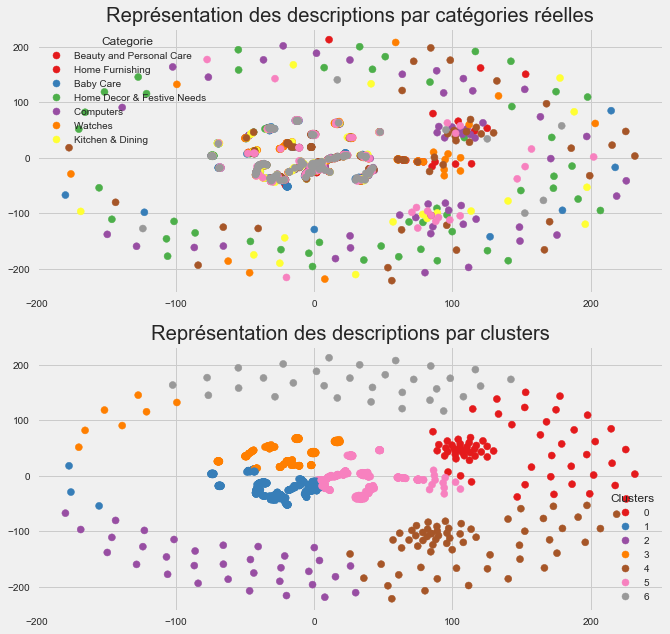

ARI :  0.0317


In [83]:
TSNE_visu_fct(X_tsne, all_cat.values, labels, ARI)

### BERT

In [346]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *
os.environ["TF_KERAS"]='1'

In [347]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [348]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
corpus = list(data_features['tokens_bow_lem'].apply(lambda x : ' '.join(x))) 
#sentences = data_T['sentence_dl'].to_list()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\pouru/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [349]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, corpus, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\pouru/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  707.0


In [350]:
ARI, X_tsne, labels = ARI_fct(features_bert, all_cat.values)

ARI :  0.2072 time :  29.0


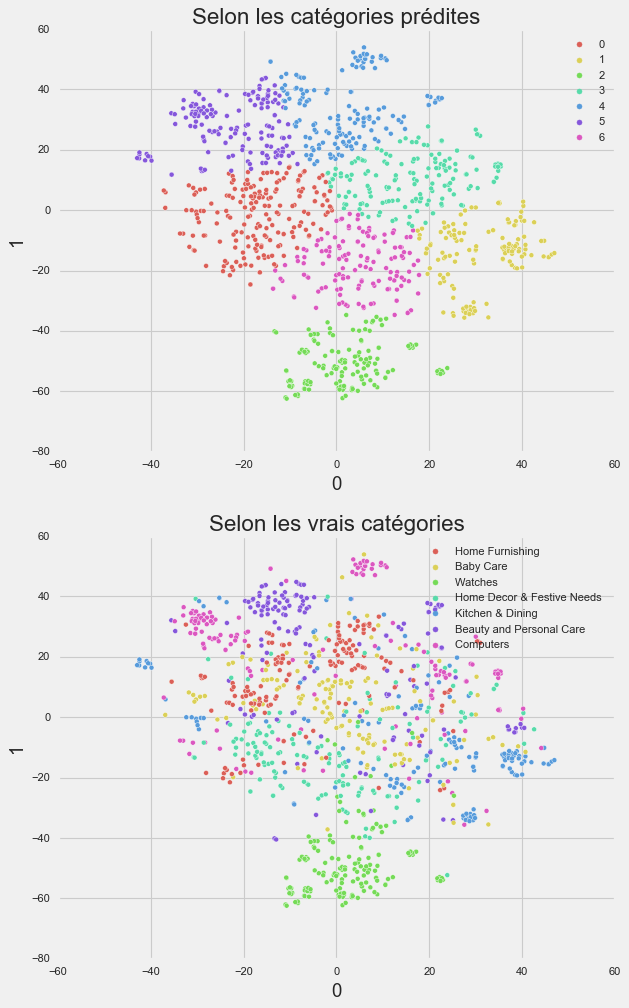

In [351]:
ARI, X_tsne, labels = ARI_fct(features_bert, all_cat.values)
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

## Conclusion sur la partie Texte

- Nous avons effectués les traitements classiques de NLP
- A la suite de ce traitement nous avons utiliser les méthodes suivantes :
    - Countvectorizer
    - tf-idf
    - Méthodes de word/sentense embeding
    
    Couplées à une TSNE et un algorithme de Kmeans pour déterminer de manières automatique les objets appartenant au même groupe.
    
Les meilleurs résultats sont optenues avec l'utilisation des features provenant de TF-IDF avec un ARI de 0.61. (Suite à une ACP à 99%)



# Classification automatique des images

Notre objectif est à présent de pouvoir classifier les images des descriptions automatiquement.  

Dans un premier temps nous traiterons les images.

Nous utiliserons ensuite les méthodes suivantes :  
- La méthode sift 
- Une méthode de transfert learning 

## Lecture des données

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path_image = r"D:\Documents\Road2DataScience\OCProjets\Projet6\Data\Flipkart\Images"
list_photos = [file for file in listdir(path_image)]
print(len(list_photos))


path_data = r"D:\Documents\Road2DataScience\OCProjets\Projet6\Data\Flipkart\flipkart_com-ecommerce_sample_1050.csv"

1050


In [355]:
data_txt = pd.read_csv(path_data)
data_txt.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

### Association des images et des labels  


In [356]:
from sklearn import preprocessing

def lambda_cat(cat_tree):
    cat_tree = cat_tree.replace('["', '')
    cat_tree = cat_tree.split(">>")
    return cat_tree[0]
    
data = pd.DataFrame()
data["image_path"] = data_txt['uniq_id'] + ".jpg"
data["label_name"] = data_txt['product_category_tree'].apply(lambda x : lambda_cat(x))
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data

image_path        label_name  label
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing       4
1     7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care       0
2     64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care       0
3     d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing       4
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing       4
...                                    ...               ...    ...
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care       0
1046  fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care       0
1047  5912e037d12774bb73a2048f35a00009.jpg        Baby Care       0
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care       0
1049  f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care       0

[1050 rows x 3 columns]

In [357]:
data['label_name'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

### Visualisation des images  

Nous proposons de visualiser un échantillon d'image selon les catégories.

Home Furnishing 


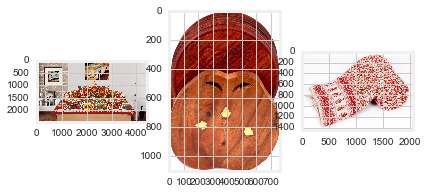

Baby Care 


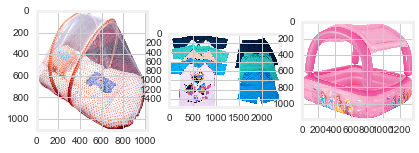

Watches 


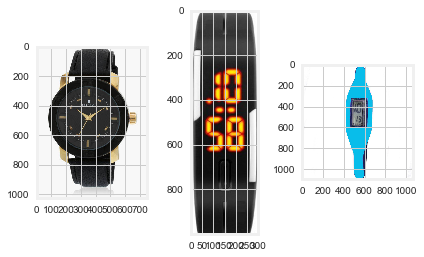

Home Decor & Festive Needs 


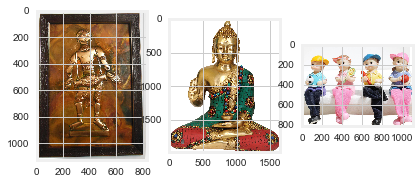

Kitchen & Dining 


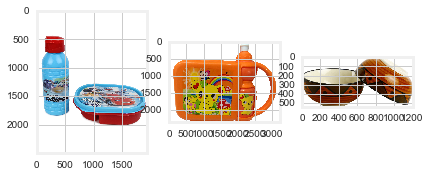

Beauty and Personal Care 


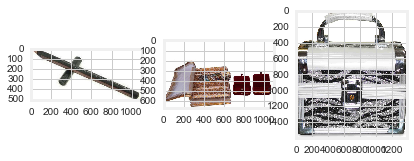

Computers 


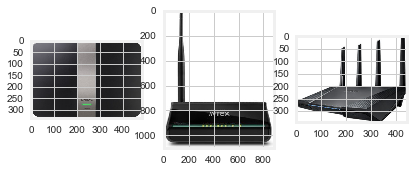

In [358]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name =data[data['label_name'] == name]['image_path'].values
    return list_image_name

list_Home_Furnishing = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Home Furnishing "]
list_Baby_Care = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Baby Care "]
list_Watches = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Watches "]
list_Decor_Festive = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Home Decor & Festive Needs "]
list_Kitchen_Dinings = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Kitchen & Dining "]
list_Beauty_Personal_Care  = [list_photos[i] for i in range(len(data)) if data["label_name"][i]=="Beauty and Personal Care "]

for name in data['label_name'].unique() :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path_image +"/"+ list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Traiter les images

### Première utilisation de SIFT

On recherche puis affiche les descripteurs

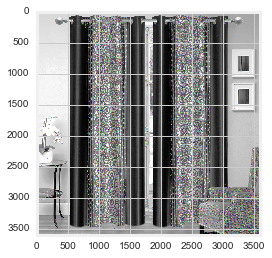

Descripteurs :  (98201, 128)

[[  0.   0.   0. ...   0.   0.   0.]
 [  7.   0.   0. ...   3.   0.   7.]
 [ 12.   6.   3. ...   4.   0.   0.]
 ...
 [113.  43.  54. ...   0.   0.   0.]
 [ 33.  14.   3. ...  16.   5.   3.]
 [ 57.  32. 118. ...   0.   0.   0.]]


In [359]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path_image +'/'+ data['image_path'][0],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

Nous avons ici 8896 descripteurs.

### Egalisation de l'histogramme

Avant égalisation de l'histogramme


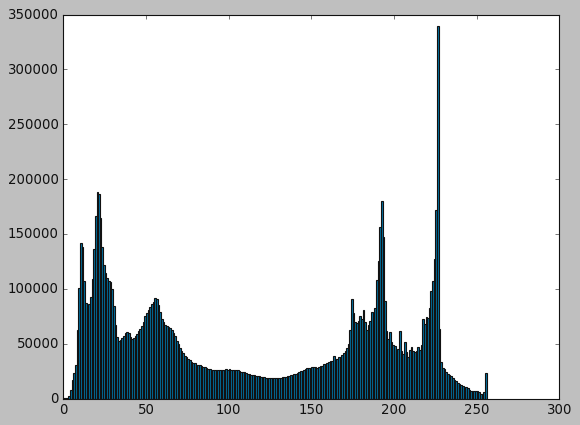

In [360]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

print("Avant égalisation de l'histogramme")
image = cv2.imread(path_image +'/'+ data['image_path'][0],0) # convert in gray
plt.hist(image.ravel(),256,[0,256]); plt.show()

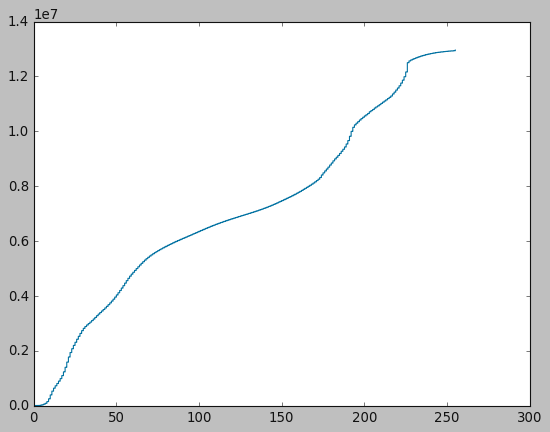

In [361]:
test_cum = image.ravel()
sorted_data = np.sort(test_cum)  
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1

Après égalisation de l'histogramme


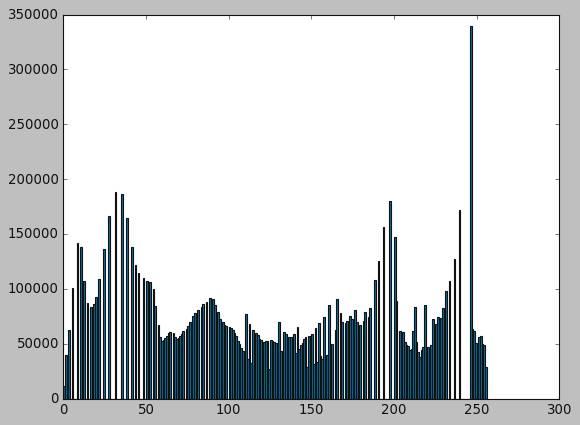

In [362]:
print("Après égalisation de l'histogramme")
plt.hist(cv2.equalizeHist(image).ravel(),256,[0,256]); plt.show()


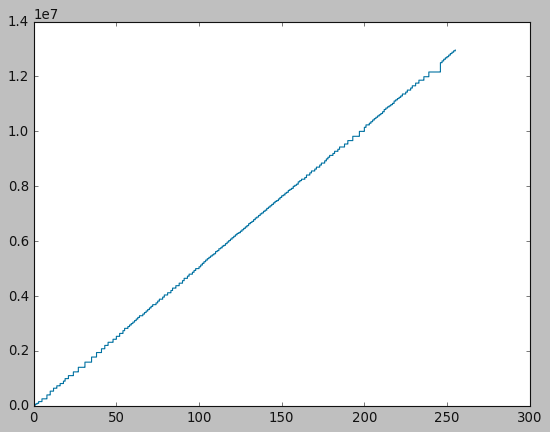

In [363]:
test_cum = cv2.equalizeHist(image).ravel()
sorted_data = np.sort(test_cum)  
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1

**Note** :  
- Egaliser l'histogramme permet de répartir plus uniformement les niveaux de gris 
- C'est une étape essentielle avant de vouloir détecter les descripteurs de l'image

### Appliquer un filtre

Le filtrage constitue un volet important en traitement d'images, et un de ses objectifs principaux est de nettoyer l'image en éliminant le plus de bruit possible

Il existe différents filtres, mais se basent tous sur le même principe :  
Utiliser le voisinage d'un pixel pour en extraire un nouveau pixel "lissé".

On peut citer le filtre moyenneur, avec des poids constants (1/|voisinage|). ou alors des poids variables (proportionels à la distance du pixel)
Cette opération de combinaison linéaire peut être mise en oeuvre mathématiquement par un produit de convolution.


Un exemple de filtre non-linéaire est le filtre médian, dont le principe est proche du filtre moyenneur : la valeur de chaque pixel est remplacée par la médiane (et non la moyenne) de son voisinage.


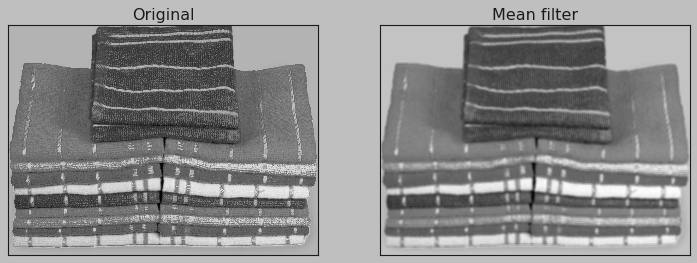

In [71]:
figure_size = 9

image = cv2.imread(path_image +'/'+ data['image_path'][2]) 
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

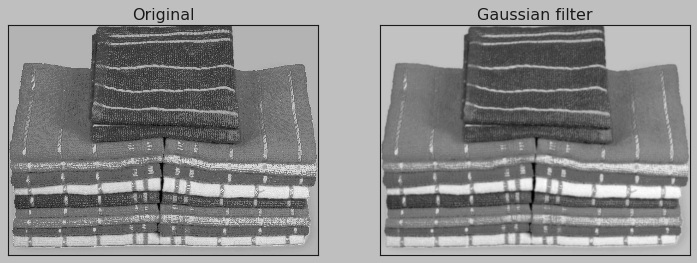

In [73]:
figure_size = 9

image = cv2.imread(path_image +'/'+ data['image_path'][2]) 
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()

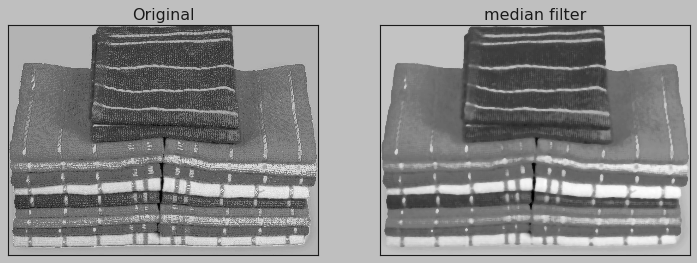

In [74]:
figure_size = 9

image = cv2.imread(path_image +'/'+ data['image_path'][2]) 
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image_gauss = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('median filter')
plt.xticks([]), plt.yticks([])
plt.show()

Plus de détail sur le lien suvant : 
    https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

## Utilisation de SIFT

L'objectif reste bien de pouvoir classifier les images selon les 7 catégories.

Pour ce faire nous allons devoir détecter les features de chaque image.
On peut considérer que le point d'intérêt dans une image sont ces coins (détecteur de Harris-Stephens) et ces bords (filtre de Canny) 

Les bords se situent dans les régions de l'image qui présentent de forts changements. En effet, les contours des objets correspondent à des changements de profondeur (on passe d'un objet à un autre situé en arrière-plan), et les ombres et différentes textures à des changements d'illumination. Pour detecter ces changements on calcule le "gradient " d'un pixel à l'autre, s'il est suppérieur à un certain seuil alors on considére point comme un bord.

Les coins se situent aux endoits où le gradient (intensité lumineuse ) change dans plusieurs directions.

La méthode SIFT (Scale-invariant feature transform) comporte un avantage certain comparé aux autres méthodes : elle est insensible au changement d'échelle. 





**Note :**  
On limite le nombre de descripteur à 500 pour chaque image

In [76]:
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(data['image_path'])) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path_image +'/'+ data['image_path'][image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    res = cv2.medianBlur(res,7) # Filtrage
    kp, des = sift.detectAndCompute(res, None) 
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\Users\pouru\AppData\Local\Temp/ipykernel_15540/3938914169.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (483069, 128)
temps de traitement SIFT descriptor :          1559.50 secondes


### Création des clusters des descripteurs   

L"idée est de réunir les descripteurs "proches" entre eux, pour l'instant nous avons 500k descriteurs.  
Une fois les descripteurs réunis en plusieurs grandes fammilles nous procèderons à un bag of visual word en comptant le nombre de fois qu'un descripteur apparait dans une image.
L'ordre de grandeur du nombre de clusteur est subjectif. 

In [365]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# k = int(round(np.sqrt(len(sift_keypoints_all)),0))
# print("Nombre de clusters estimés : ", k)
# print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=700, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

temps de traitement kmeans :            34.44 secondes


Des références montrent qu'utiliser la racine du nombre de descripteur est un bon point de départ pour évaluer la pertinence de la méthode

In [366]:
import math
math.sqrt(483069)

695.0316539554152

### Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [367]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           192.77 secondes


### Réduction PCA

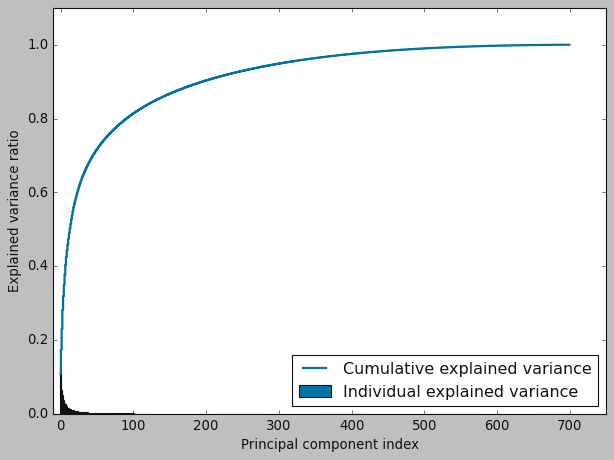

In [461]:
pca = PCA()
#
X_train_pca = pca.fit_transform(im_features)
#
exp_var_pca = pca.explained_variance_ratio_

#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca,  align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, linewidth=2,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-10, 750])
plt.ylim([0, 1.1])
plt.show()

In [371]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 700)
Dimensions dataset après réduction PCA :  (1050, 502)


In [372]:
cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(feat_pca)
print('Sans scaler cv')
adjusted_rand_score(cls.labels_,all_cat.values)

Sans scaler cv


0.02493811809019698

### TSNE et Clustering

In [373]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=10, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label"]
print(df_tsne.shape)

(1050, 3)


In [374]:
ARI, X_tsne, labels = ARI_fct(feat_pca, all_cat.values)
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

ARI :  0.0345 time :  28.0


## Transfert Learning

Comme dans : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/?utm_medium=email&utm_content=nov-18-has-completed-mentoring-session-student&bsft_clkid=d16f34dd-42fa-4906-8ab6-bcc512a11303&bsft_uid=3886902c-a706-48cc-92af-5493d2d046c5&bsft_mid=71aab91c-4090-4495-bb03-99cf56c3971b&bsft_eid=7244055d-47f0-a6f2-c394-7a20ebb3a726&bsft_txnid=eccd6592-b62f-4bec-a140-44a6ac2d8c4b&bsft_mime_type=html&bsft_ek=2022-08-22T09%3A20%3A04Z&bsft_aaid=a265d396-7432-4eb2-9c9a-ba5eea75629e&bsft_tv=10

Nous avons le possibilé soit d'utiliser directement le modèle pour faire des prévisions (à voir si on peut utiliser cette méthode puis dans un deuxieme temps utiliser une comparaison des distances avec un word embeding : on plonge la prédiction et les catégories et on calcule la similarité la plus proche avec le cosinus de l'ange)  

Nous ne voulons pas entrainer à nouveau un réseau de neurone en initialisant les poids du VGG16, l'idée étant de faire une classification non supervisée.   

La méthode de features extraction semble la plus appropiée :   
On utilise le réseau de neuronne existant, mais on l'ampute avant l'output layer.

### Importation modèle VGG16

#### Petits tets

In [376]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


In [378]:
# load an image from file
image = load_img(path_image + '/' + data['image_path'][45], target_size=(224, 224))

In [379]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (90.45%)


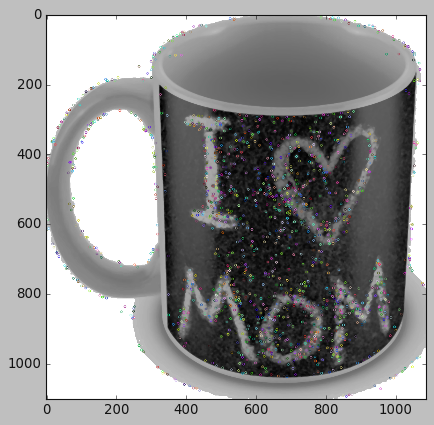

Descripteurs :  (1662, 128)

[[  0.   0.   3. ...  47.   0.   1.]
 [  4.   2.   1. ...   0.   0.   2.]
 [103.   0.   0. ...   0.   0.   0.]
 ...
 [  4. 116.   0. ...   0.   0.   1.]
 [ 13. 125.   4. ...   0.   0.   0.]
 [  6.   0.   0. ...   0.   0.   0.]]


In [380]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path_image +'/'+ data['image_path'][45],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
image = cv2.medianBlur(image,7)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

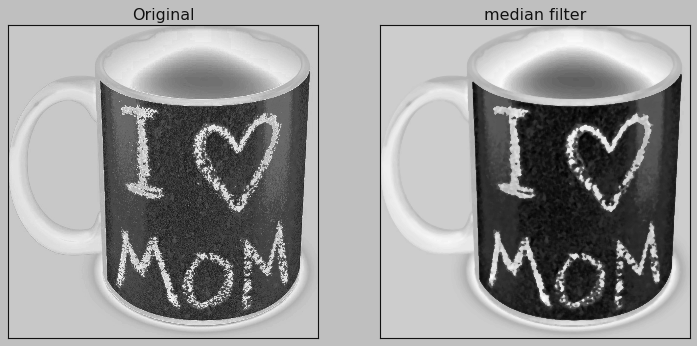

In [464]:
image = cv2.imread(path_image +'/'+ data['image_path'][45]) 
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image_gauss = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('median filter')
plt.xticks([]), plt.yticks([])
plt.show()

ça marche quand même étonnamment bien ! 

### Features extraction

In [393]:
from keras.models import Model

# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)


image = load_img(path_image + '/' + data['image_path'][45], target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model

# get extracted features
features = model.predict(image)
print(features.shape)

(1, 4096)


In [395]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [400]:
images_VGG_features = []

for image_num in range(len(data['image_path'])) :
    if image_num%100 == 0 : print(image_num)
    image = load_img(path_image + '/' + data['image_path'][image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load the model

    # get extracted features
    features = model.predict(image)
    images_VGG_features.append(features)

0
100
200
300
400
500
600
700
800
900
1000


In [401]:
for i in range(len(images_VGG_features)):
    images_VGG_features[i] = images_VGG_features[i][0]

#### ACP

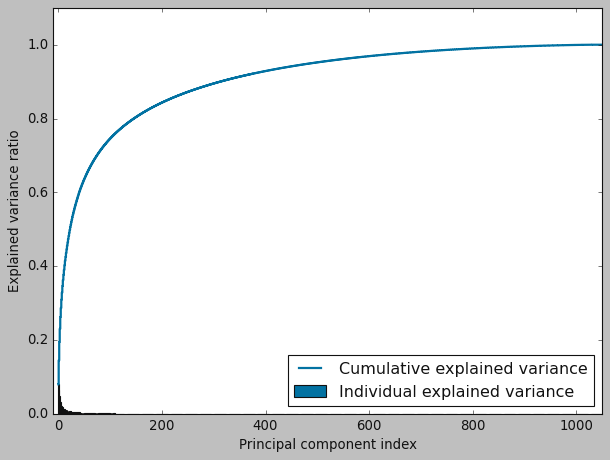

In [403]:
pca = PCA()
#
X_train_pca = pca.fit_transform(images_VGG_features)
#
exp_var_pca = pca.explained_variance_ratio_

#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca,  align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, linewidth=2,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-10, 1050])
plt.ylim([0, 1.1])
plt.show()

In [404]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
images_VGG_features_pca= pca.fit_transform(images_VGG_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 700)
Dimensions dataset après réduction PCA :  (1050, 502)


In [405]:
rez_ari = []
for k in range(20):
    k = (k+1)*5
    print(f"Pour une perplexité de {k}")
    ARI, X_tsne, labels = ARI_fct(images_VGG_features_pca,all_cat.values, num_labels = 7, perplexity = k)
    rez_ari.append(ARI)

Pour une perplexité de 5
ARI :  0.4508 time :  21.0
Pour une perplexité de 10
ARI :  0.4435 time :  27.0
Pour une perplexité de 15
ARI :  0.4494 time :  27.0
Pour une perplexité de 20
ARI :  0.4482 time :  26.0
Pour une perplexité de 25
ARI :  0.492 time :  28.0
Pour une perplexité de 30
ARI :  0.4443 time :  30.0
Pour une perplexité de 35
ARI :  0.4252 time :  30.0
Pour une perplexité de 40
ARI :  0.4529 time :  31.0
Pour une perplexité de 45
ARI :  0.5071 time :  33.0
Pour une perplexité de 50
ARI :  0.4496 time :  34.0
Pour une perplexité de 55
ARI :  0.4591 time :  36.0
Pour une perplexité de 60
ARI :  0.4486 time :  39.0
Pour une perplexité de 65
ARI :  0.4539 time :  38.0
Pour une perplexité de 70
ARI :  0.4885 time :  39.0
Pour une perplexité de 75
ARI :  0.4439 time :  27.0
Pour une perplexité de 80
ARI :  0.4623 time :  37.0
Pour une perplexité de 85
ARI :  0.5855 time :  48.0
Pour une perplexité de 90
ARI :  0.4488 time :  46.0
Pour une perplexité de 95
ARI :  0.5058 time :  

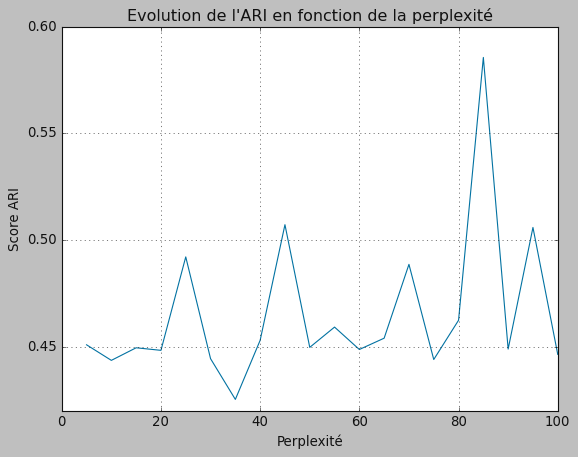

In [406]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(5, 105, 5)
s = rez_ari

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Perplexité', ylabel='Score ARI',
       title="Evolution de l'ARI en fonction de la perplexité" )
ax.grid()

fig.savefig("test.png")
plt.show()


In [424]:
ARI, X_tsne, labels_best = ARI_fct(images_VGG_features_pca,all_cat.values, num_labels = 7, perplexity = 85)


ARI :  0.5855 time :  42.0


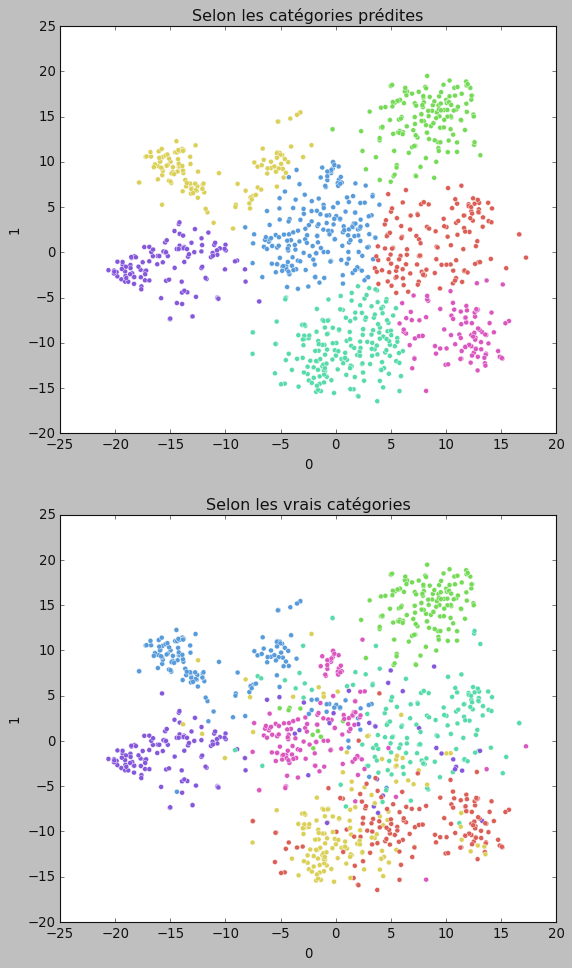

In [412]:
def plot_tsne_true_false(X_tsne, true_label, labels_kmeans, ARI):
    
    df_tsne_best = pd.DataFrame(X_tsne)
    df_tsne_best['true_labels'] = true_label
    df_tsne_best['labels_kmeans'] = labels_kmeans
    
    fig, ax =plt.subplots( 2,1,figsize=(8, 14))
    
    ax[1].legend(bbox_to_anchor=(1.1, 1.05))
    sns.scatterplot(x=0, y=1, hue=df_tsne_best.true_labels.tolist(),
                    palette=sns.color_palette("hls", 7),
                    data=df_tsne_best, ax=ax[1]).set(title="Selon les vrais catégories") 
    sns.scatterplot(x=0, y=1, hue=df_tsne_best.labels_kmeans.tolist(),
                    palette=sns.color_palette("hls", 7),
                    data=df_tsne_best, ax=ax[0]).set(title="Selon les catégories prédites") 
    ax[1].get_legend().remove()
    ax[0].get_legend().remove()
    fig.show()
    
plot_tsne_true_false(X_tsne, all_cat.values, labels, ARI)

In [437]:
def conf_mat_transform(y_true,y_pred) :
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [3,5,6,0,2,1,4]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    #conf_mat = metrics.confusion_matrix(y_true,labels)
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(true_label, labels_best)
conf_mat = metrics.confusion_matrix(true_label, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(true_label, cls_labels_transform))

Correspondance des clusters :  [3, 5, 6, 0, 2, 1, 4]
[[111   3  10  12  10   4   0]
 [  5 118  13  10   1   1   2]
 [  6   2 137   2   2   0   1]
 [  4   1  18 112   5   3   7]
 [ 64   0   2   1  83   0   0]
 [  2   2  24   0   0 122   0]
 [  0   0   9   0   0   0 141]]

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       150
           1       0.94      0.79      0.86       150
           2       0.64      0.91      0.75       150
           3       0.82      0.75      0.78       150
           4       0.82      0.55      0.66       150
           5       0.94      0.81      0.87       150
           6       0.93      0.94      0.94       150

    accuracy                           0.78      1050
   macro avg       0.81      0.78      0.79      1050
weighted avg       0.81      0.78      0.79      1050



# Image + description

Naturellement nous voulons pouvoir combiner les deux features (texte et image) pour avoir un meilleur résultat.  
- meilleures features pour le texte : ctf_transform_pca 
- meilleures features pour les images : images_VGG_features_pca

## Réunir les deux features

In [447]:
feature_VGG_tfidf = []
for i in range(len(ctf_transform_pca)):
    feature_VGG_tfidf.append(np.concatenate([ctf_transform_pca[i],images_VGG_features_pca[i]]))

In [448]:
len(feature_VGG_tfidf[0])

1576

### ACP

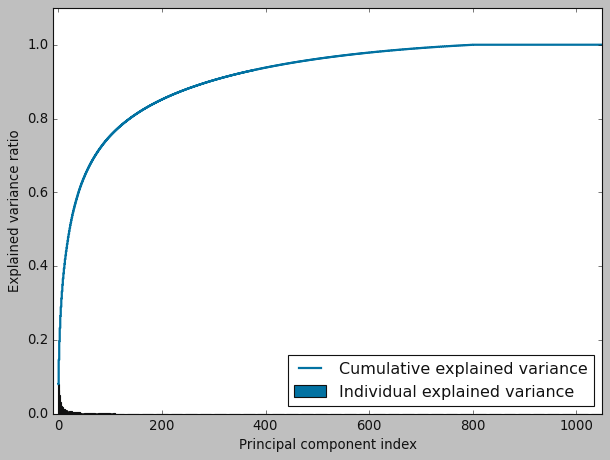

In [449]:
pca = PCA()
#
X_train_pca = pca.fit_transform(feature_VGG_tfidf)
#
exp_var_pca = pca.explained_variance_ratio_

#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca,  align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, linewidth=2,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([-10, 1050])
plt.ylim([0, 1.1])
plt.show()

In [452]:
print("Dimensions dataset avant réduction PCA : ", len(feature_VGG_tfidf[0]))
pca = decomposition.PCA(n_components=0.99)
feature_VGG_tfidf_pca= pca.fit_transform(feature_VGG_tfidf)
print("Dimensions dataset après réduction PCA : ", len(feature_VGG_tfidf_pca[1]))

Dimensions dataset avant réduction PCA :  1576
Dimensions dataset après réduction PCA :  691


In [453]:
rez_ari = []
for k in range(20):
    k = (k+1)*5
    print(f"Pour une perplexité de {k}")
    ARI, X_tsne, labels = ARI_fct(feature_VGG_tfidf_pca,all_cat.values, num_labels = 7, perplexity = k)
    rez_ari.append(ARI)

Pour une perplexité de 5
ARI :  0.4265 time :  28.0
Pour une perplexité de 10
ARI :  0.4849 time :  27.0
Pour une perplexité de 15
ARI :  0.4402 time :  32.0
Pour une perplexité de 20
ARI :  0.4871 time :  30.0
Pour une perplexité de 25
ARI :  0.485 time :  27.0
Pour une perplexité de 30
ARI :  0.4824 time :  31.0
Pour une perplexité de 35
ARI :  0.4833 time :  30.0
Pour une perplexité de 40
ARI :  0.4393 time :  35.0
Pour une perplexité de 45
ARI :  0.4935 time :  32.0
Pour une perplexité de 50
ARI :  0.4827 time :  34.0
Pour une perplexité de 55
ARI :  0.4335 time :  37.0
Pour une perplexité de 60
ARI :  0.4306 time :  44.0
Pour une perplexité de 65
ARI :  0.5651 time :  41.0
Pour une perplexité de 70
ARI :  0.5305 time :  33.0
Pour une perplexité de 75
ARI :  0.4576 time :  43.0
Pour une perplexité de 80
ARI :  0.4808 time :  44.0
Pour une perplexité de 85
ARI :  0.4863 time :  51.0
Pour une perplexité de 90
ARI :  0.5074 time :  43.0
Pour une perplexité de 95
ARI :  0.494 time :  4